# TestFourierTransform

## FFT of waveform

Import necessary modules

In [77]:
import numpy as np
import scipy as sc
import scipy.fft as scfft
import matplotlib.pyplot as plt
import uproot

Making some random waveform to analyse

In [2]:
x=np.arange(0,100,0.001)
wave=3*np.sin(2*np.pi*x)
#wave=5*np.exp(-x/2)
#wave=3*np.sin(2*np.pi*x)+5*np.sin(4*2*np.pi*x + np.pi/2)

Fourier transforming the randomly generated waveform

In [3]:
FFT=scfft.fft(wave)
freq=scfft.fftfreq(len(x),(x[-1]-x[0])/len(x))

Reverse fourier transforming for checking if nothing went wrong

In [4]:
RetrievedWave=scfft.ifft(FFT)
np.max(np.imag(RetrievedWave))
print(RetrievedWave)

[ 2.58493941e-29+2.91038305e-16j  1.88494319e-02-2.91038305e-16j
  3.76981197e-02-2.91038305e-16j ... -5.65453191e-02-7.44383663e-17j
 -3.76981196e-02+2.69807346e-16j -1.88494319e-02+4.49678911e-17j]


Visualising computed results

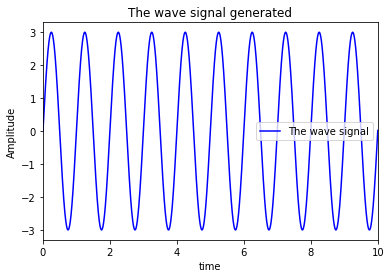

In [5]:
plt.figure() #visualization 
plt.plot(x,wave,'-',color='b', label="The wave signal")
plt.title("The wave signal generated")
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.xlim(0,10)
plt.legend()
#plt.savefig("Comparison_Euler_and_RK4_and_analytical")
plt.show()

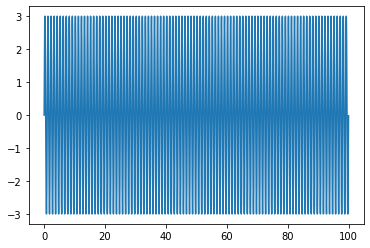

In [6]:
x=np.arange(0,100,0.001)
wave=3*np.sin(2*np.pi*x)

plt.figure() #visualization 
plt.plot(x,wave)

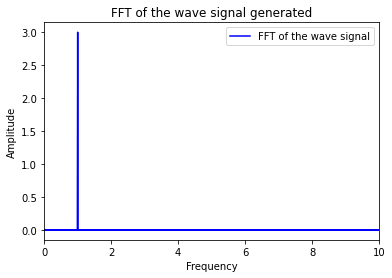

In [7]:
plt.figure() #visualization 
plt.plot(freq,(2/len(x))*np.abs(FFT),'-',color='b', label="FFT of the wave signal")
plt.title("FFT of the wave signal generated")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0,10)
plt.legend()
#plt.savefig("Comparison_Euler_and_RK4_and_analytical")
plt.show()

/home/jstoffels/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


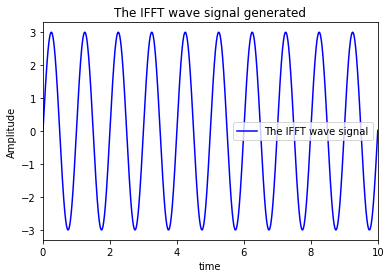

In [8]:
plt.figure() #visualization 
plt.plot(x,RetrievedWave,'-',color='b', label="The IFFT wave signal")
plt.title("The IFFT wave signal generated")
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.xlim(0,10)
plt.legend()
#plt.savefig("Comparison_Euler_and_RK4_and_analytical")
plt.show()

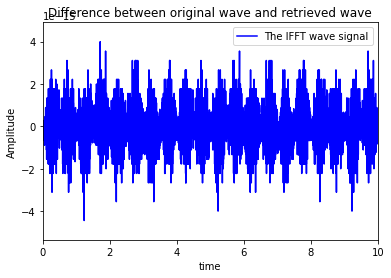

In [9]:
plt.figure() #visualization 
plt.plot(x,wave-np.real(RetrievedWave),'-',color='b', label="The IFFT wave signal")
plt.title("Difference between original wave and retrieved wave")
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.xlim(0,10)
plt.legend()
#plt.savefig("Comparison_Euler_and_RK4_and_analytical")
plt.show()

## Applying to data

### Exploring the data

In [10]:
#File=uproot.open("C:/Users/Jethro/Desktop/Master thesis/RNO_DATA_DIR/station11/run101/combined.root")
#File=uproot.open("C:\Users\Jethro\Desktop\Master thesis\RNO_DATA_DIR\station11\run101\combined.root") #When from windows
FileSt11R101=uproot.open("/mnt/c/Users/Jethro/Desktop/Master thesis/RNO_DATA_DIR/station11/run101/combined.root") #When from ubuntu
FileSt11R101.values()
for i in range(0,3):
    print(FileSt11R101['combined'].branches[i])


<TBranchElement 'waveforms' (6 subbranches) at 0x7f37e6f54760>
<TBranchElement 'header' (14 subbranches) at 0x7f37e6fb6a60>
<TBranchElement 'daqstatus' (15 subbranches) at 0x7f37e6fe0700>


#### WaveForm Node

In [11]:
FileSt11R101['combined'].show(recursive=False)

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
waveforms            | mattak::Waveforms        | AsGroup(<TBranchElement 'wa...
header               | mattak::Header           | AsGroup(<TBranchElement 'he...
daqstatus            | mattak::DAQStatus        | AsGroup(<TBranchElement 'da...


In [12]:
FileSt11R101['combined']['waveforms'].show(  name_width=22, typename_width=24, interpretation_width=30,recursive=False)

name                   | typename                 | interpretation                
-----------------------+--------------------------+-------------------------------
waveforms              | mattak::Waveforms        | AsGroup(<TBranchElement 'wavef
TObject                | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
run_number             | uint32_t                 | AsDtype('>u4')
event_number           | uint32_t                 | AsDtype('>u4')
station_number         | uint16_t                 | AsDtype('>u2')
buffer_length          | uint16_t                 | AsDtype('>u2')
radiant_data[24][2048] | int16_t[24][2048]        | AsDtype("('>i2', (24, 2048))")


In [13]:
FileSt11R101['combined']['waveforms']['TObject'].show(  name_width=22, typename_width=24, interpretation_width=30)

name                   | typename                 | interpretation                
-----------------------+--------------------------+-------------------------------
TObject                | (group of fUniqueID:uint | AsGroup(<TBranchElement 'TObje
fUniqueID              | uint32_t                 | AsDtype('>u4')
fBits                  | uint8_t                  | AsDtype('uint8')


radiant_data:

In [14]:
RadiantDataSt11R101=FileSt11R101['combined']['waveforms']['radiant_data[24][2048]'].array(library='np')
print("Shape of the radiant_data[24][2048] AsDtype is:")
print(RadiantDataSt11R101.shape) #107 is for events, 24 channels, 2048 samples

Shape of the radiant_data[24][2048] AsDtype is:
(7, 24, 2048)


event_number:

In [15]:
EventNrsSt11R101=FileSt11R101['combined']['waveforms']['event_number'].array(library="np")
print("\n event_number is:")
print("length is " + str(EventNrsSt11R101.size))
print(EventNrsSt11R101)


 event_number is:
length is 7
[  3   4 241 343 466 476 641]


station_number:

In [16]:
StationNumberSt11R101=FileSt11R101['combined']['waveforms']['station_number'].array(library="np")
print("\n station_number is:")
print("length is " + str(StationNumberSt11R101.size))
print(StationNumberSt11R101)


 station_number is:
length is 7
[0 0 0 0 0 0 0]


run_number:

In [17]:
RunNumberSt11R101=FileSt11R101['combined']['waveforms']['run_number'].array(library="np")
print("\n run_number is:")
print("length is " + str(RunNumberSt11R101.size))
print(RunNumberSt11R101)


 run_number is:
length is 7
[35 35 35 35 35 35 35]


buffer_length:

In [18]:
BLenSt11R101=FileSt11R101['combined']['waveforms']['buffer_length'].array(library="np")
print("\n buffer_length is:")
print("length is " + str(BLenSt11R101.size))
print(BLenSt11R101)


 buffer_length is:
length is 7
[2048 2048 2048 2048 2048 2048 2048]


#### Header Node

In [19]:
FileSt11R101['combined']['header'].show(  name_width=22, typename_width=24, interpretation_width=30)

name                   | typename                 | interpretation                
-----------------------+--------------------------+-------------------------------
header                 | mattak::Header           | AsGroup(<TBranchElement 'heade
TObject                | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
TObject/fUniqueID      | uint32_t                 | AsDtype('>u4')
TObject/fBits          | uint8_t                  | AsDtype('uint8')
run_number             | uint32_t                 | AsDtype('>u4')
event_number           | uint32_t                 | AsDtype('>u4')
trigger_number         | uint32_t                 | AsDtype('>u4')
station_number         | uint16_t                 | AsDtype('>u2')
buffer_length          | uint16_t                 | AsDtype('>u2')
pretrigger_samples     | uint16_t                 | AsDtype('>u2')
readout_time           | double                   | AsDtype('>f8')
pps_num                | uint32_t                 | AsDtype('>u

In [20]:
TriggerInfoSt11R101=FileSt11R101['combined']['header']['trigger_info'].array(library='np')
#TriggerInfoSt11R101.shape
print(len(TriggerInfoSt11R101['trigger_info.rf_trigger']))
print(len(EventNrsSt11R101))

7
7


In [21]:
ReadoutTimesSt11R101=FileSt11R101['combined']['header']['readout_time'].array(library='np')
ReadoutTimesSt11R101.shape
ReadoutTimesSt11R101

array([1.62709937e+09, 1.62709938e+09, 1.62710177e+09, 1.62710279e+09,
       1.62710403e+09, 1.62710413e+09, 1.62710579e+09])

In [22]:
TriggerTimesSt11R101=FileSt11R101['combined']['header']['trigger_time'].array(library='np')
print(TriggerTimesSt11R101.shape)
TriggerTimesSt11R101

(7,)


array([1.62709937e+09, 1.62709938e+09, 1.62710177e+09, 1.62710279e+09,
       1.62710403e+09, 1.62710413e+09, 1.62710579e+09])

#### DAQStat Node

In [23]:
FileSt11R101['combined']['daqstatus'].show(  name_width=22, typename_width=24, interpretation_width=30,recursive=False)

name                   | typename                 | interpretation                
-----------------------+--------------------------+-------------------------------
daqstatus              | mattak::DAQStatus        | AsGroup(<TBranchElement 'daqst
TObject                | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
readout_time_radiant   | double                   | AsDtype('>f8')
readout_time_lt        | double                   | AsDtype('>f8')
radiant_thresholds[24] | uint32_t[24]             | AsDtype("('>u4', (24,))")
radiant_scalers[24]    | uint32_t[24]             | AsDtype("('>u4', (24,))")
radiant_prescalers_... | uint8_t[24]              | AsDtype("('u1', (24,))")
radiant_scaler_period  | float                    | AsDtype('>f4')
lt_trigger_threshol... | uint32_t[4]              | AsDtype("('>u4', (4,))")
lt_servo_thresholds[4] | uint32_t[4]              | AsDtype("('>u4', (4,))")
lt_1Hz_scalers         | mattak::LTScalerGroup    | AsGroup(<TBranchElement 'lt.

In [24]:
ReadoutTimesRadiantSt11R101=FileSt11R101['combined']['daqstatus']['readout_time_radiant'].array(library='np')
ReadoutTimesRadiantSt11R101.shape
ReadoutTimesRadiantSt11R101

array([1.62709937e+09, 1.62709938e+09, 1.62710177e+09, 1.62710279e+09,
       1.62710403e+09, 1.62710413e+09, 1.62710579e+09])

### Visualisation & FFT

Visualisation of radiant_data in order to figure out what the third dimension of the array means:
(try out for the case of the zeroth channel and the zeroth event)

In [25]:
sampling_rate=3.2 * (10**9) #Sampling rate in Hertz according to the python file of NuRadioReco.modules.io.rno_g
TimeStep=1/sampling_rate #Time between two samples
SamplingTimes=np.arange(0,len(RadiantDataSt11R101[0][0])*TimeStep,TimeStep)

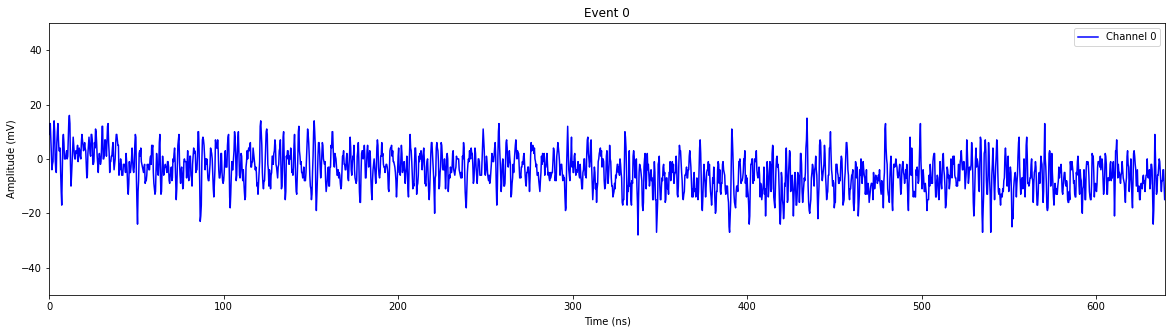

In [26]:
    #plt.figure() #visualization
    plt.figure(figsize=(20,5))
    plt.plot(SamplingTimes*(10**9),RadiantDataSt11R101[0][0],'-',color='b', label="Channel 0")
    #plt.plot(Energies,TritonEnergyLoss,'-',color='r', label="Triton")
    plt.title("Event 0")
    plt.ylim(-50,50)
    plt.xlim(0,np.max(SamplingTimes*(10**9)))
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
    plt.show()

This is the same plot as seen in RNOGDataViewer for channel 0 & event 0 => the third array dimension contains the voltages. :
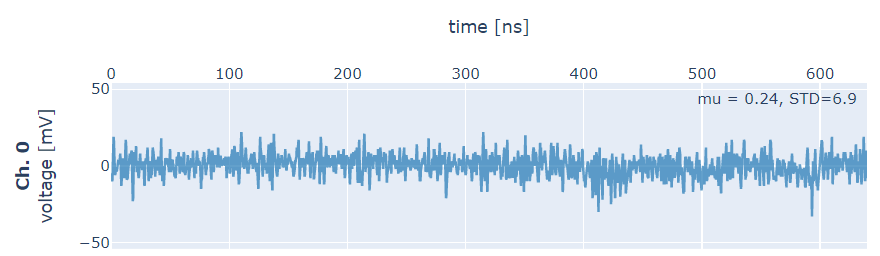

Now trying to reproduce the spectrum of this set of data

In [27]:
TestFFT=scfft.fft(RadiantDataSt11R101[0][0])
freq=scfft.fftfreq(len(SamplingTimes),(SamplingTimes[-1]-SamplingTimes[0])/len(SamplingTimes))
#for i in TestFFT:
#    print((2/len(SamplingTimes))*np.abs(i))
#freq

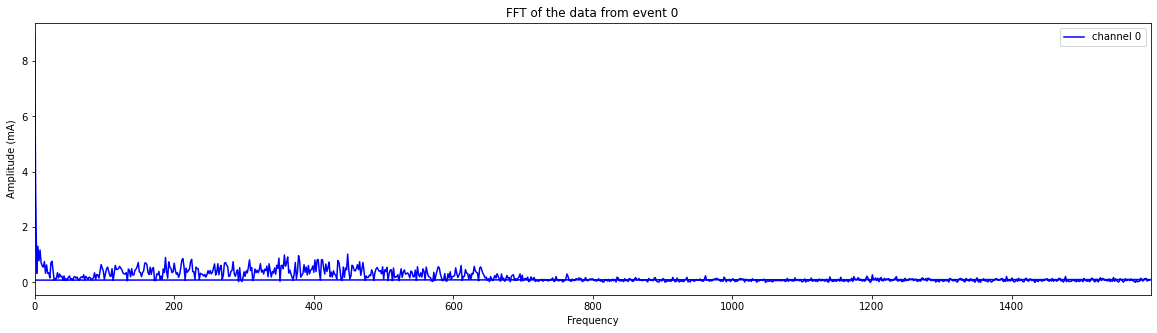

In [28]:
freq=freq*(10**-6) #Convert to MHz
plt.figure(figsize=(20,5)) #visualization 
plt.plot(freq,(2/len(SamplingTimes))*np.abs(TestFFT),'-',color='b', label="channel 0")
plt.title("FFT of the data from event 0")
plt.xlabel("Frequency")
plt.ylabel("Amplitude (mA)")
plt.xlim(0,np.max(freq))
plt.legend()
#plt.savefig("Comparison_Euler_and_RK4_and_analytical")
plt.show()
freq=freq*(10**6) #Convert back to Hz

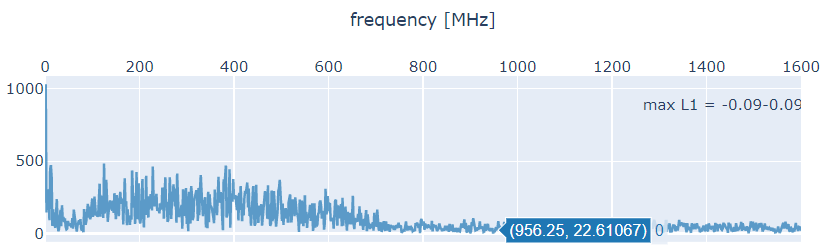

We see that the amplitudes in the spectra are different by some factor. However the qualitative behavior seems to be reconstructed correctly and so this should work equally well.

In [29]:
#from NuRadioReco.modules.io.rno_g import  rnogDataReader

In [113]:
%%capture out
%run /mnt/c/Users/Jethro/Desktop/Master\ Thesis/Functions.ipynb
%run /mnt/c/Users/Jethro/Desktop/RNO-G/GalaxyFunctions.ipynb

In [50]:
CombinedFile, DAQStatFile, HeadersFile, PedestalFile=FilesStRun(23,744)
RadiantData=CombinedFile['combined']['waveforms']['radiant_data[24][2048]'].array(library='np')

In [60]:
TestFFT=scfft.fft(1000*ADCtoVoltage(RadiantData[6][10]))
freq=scfft.fftfreq(len(SamplingTimes),(SamplingTimes[-1]-SamplingTimes[0])/len(SamplingTimes))
#for i in TestFFT:
#    print((2/len(SamplingTimes))*np.abs(i))
#freq

In [62]:
TestFFT=np.fft.fftshift(TestFFT)
freq=np.fft.fftshift(freq)

In [80]:
CombinedFile['combined']['waveforms']['event_number'].array(library="np")[11]

284

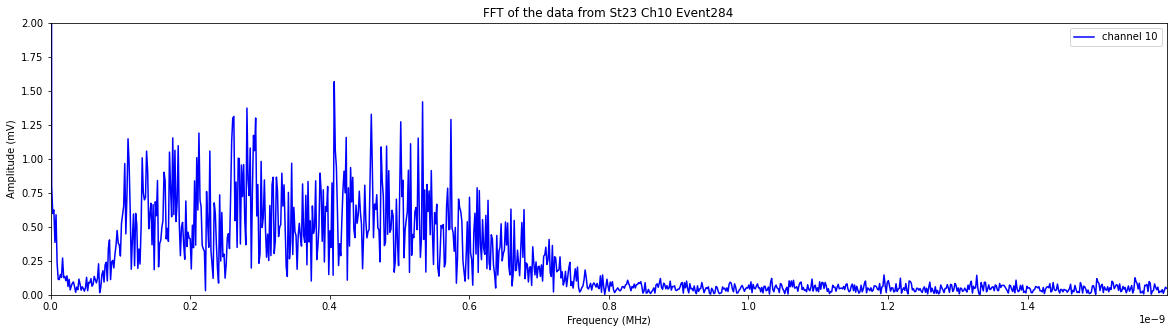

In [112]:
freq=freq*(10**-6) #Convert to MHz
plt.figure(figsize=(20,5)) #visualization 
#plt.plot(freq[int(len(freq)/2)+1:len(freq)],(2/len(SamplingTimes))*np.abs(TestFFT)[int(len(freq)/2)+1:len(TestFFT)],'-',color='b', label="channel 10")
plt.plot(freq,(2/len(SamplingTimes))*np.abs(TestFFT),'-',color='b', label="channel 10")
plt.title("FFT of the data from St23 Ch10 Event284")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude (mV)")
plt.xlim(0,np.max(freq))
plt.legend()
#plt.yscale("log")
plt.ylim(0,2)
#plt.savefig("Comparison_Euler_and_RK4_and_analytical")
plt.show()
freq=freq*(10**6) #Convert back to Hz

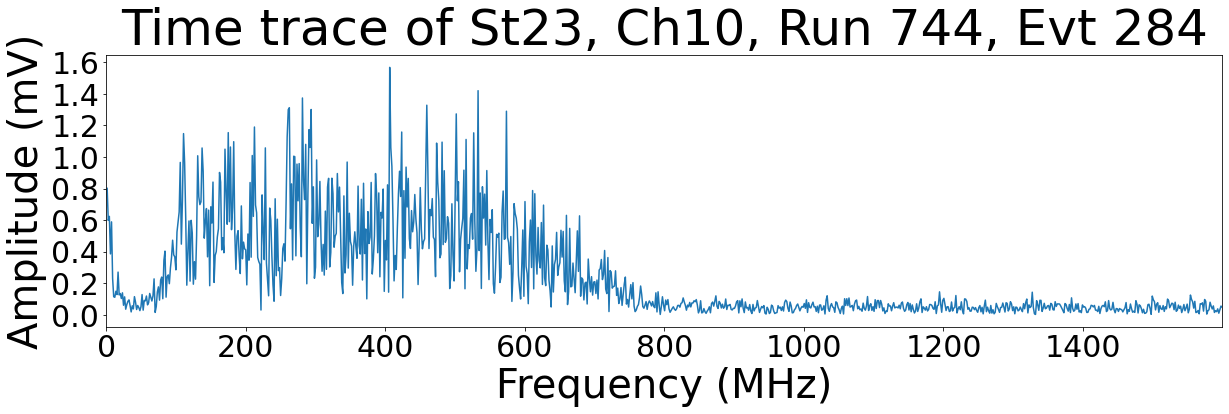

In [114]:
TimeTraceFFT(23,10,744,CombinedFile['combined']['waveforms']['event_number'].array(library="np")[11],Amplitude="mV")